# DecisionTree and RandomForest on Attrition Project

In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("general_data.csv")
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [3]:
dataset.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [4]:
from sklearn import preprocessing

In [5]:
le=preprocessing.LabelEncoder()

In [6]:
dataset["Attrition"]=le.fit_transform(dataset["Attrition"])
dataset["BusinessTravel"]=le.fit_transform(dataset["BusinessTravel"])
dataset["Department"]=le.fit_transform(dataset["Department"])
dataset["EducationField"]=le.fit_transform(dataset["EducationField"])
dataset["Gender"]=le.fit_transform(dataset["Gender"])
dataset["MaritalStatus"]=le.fit_transform(dataset["MaritalStatus"])
dataset["JobRole"]=le.fit_transform(dataset["JobRole"])

In [7]:
dataset3=dataset.drop(['EmployeeCount','EmployeeID', 'Over18','StandardHours' ],axis=1)

In [8]:
dataset3.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
dataset4=dataset3.dropna()

In [11]:
dataset5=dataset4.drop_duplicates()

In [12]:
rf_model= RandomForestClassifier(n_estimators=100,max_features=2,oob_score=True)

In [13]:
features=['Age','BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

In [14]:
rf_model.fit(X=dataset5[features],y=dataset5["Attrition"])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
print("Accuracy :",rf_model.oob_score_)

Accuracy : 0.8401360544217688


In [16]:
for feature,imp in zip(features,rf_model.feature_importances_):
    print(feature,imp)

Age 0.09730508284829184
BusinessTravel 0.02714915961979119
Department 0.024720247183429515
DistanceFromHome 0.06995666663349663
Education 0.0401068575403399
EducationField 0.042116096522552444
Gender 0.01773578919905438
JobLevel 0.037638323956614136
JobRole 0.05302413808510455
MaritalStatus 0.03872894525661769
MonthlyIncome 0.09445085473129104
NumCompaniesWorked 0.05795495929434006
PercentSalaryHike 0.06399697130810623
StockOptionLevel 0.03417336952790085
TotalWorkingYears 0.09057515543204629
TrainingTimesLastYear 0.045337148515771586
YearsAtCompany 0.06665660735338182
YearsSinceLastPromotion 0.04296728326712296
YearsWithCurrManager 0.05540634372474696


__Age MonthlyIncome TotalWorkingYears has higher values so let pass to decision tree.__

In [17]:
from sklearn import tree

In [18]:
tree_model=tree.DecisionTreeClassifier(max_depth=6,max_leaf_nodes=8)

In [19]:
predictors=pd.DataFrame([dataset5["TotalWorkingYears"],dataset5["MonthlyIncome"],dataset5["Age"]]).T

In [20]:
tree_model.fit(X=predictors,y=dataset5["Attrition"])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
with open("DtreeAtt.dot","w") as f:
    f=tree.export_graphviz(tree_model,feature_names=["TotalWorkingYears","MonthlyIncome","Age"],out_file=f)

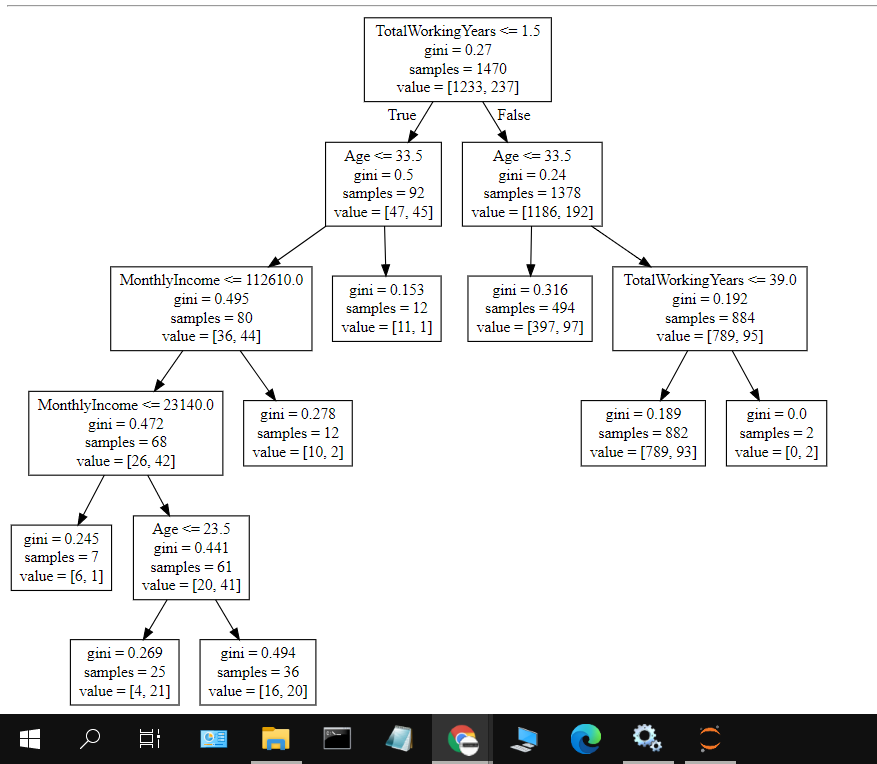

# Logistic Regression on Attrition Project

In [22]:
import statsmodels.api as sm

In [23]:
Y=dataset5["Attrition"]

In [24]:
dataset5.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [25]:
X=dataset5[['Age',  'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

In [26]:
X1=sm.add_constant(X)

In [27]:
Logistic_Attrition=sm.Logit(Y,X1)

In [28]:
result=Logistic_Attrition.fit()

Optimization terminated successfully.
         Current function value: 0.392756
         Iterations 7


In [29]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1450
Method:                           MLE   Df Model:                           19
Date:                Thu, 27 Aug 2020   Pseudo R-squ.:                  0.1108
Time:                        09:20:09   Log-Likelihood:                -577.35
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 3.295e-21
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0650      0.717      0.091      0.928      -1.340       1.470
Age                        -0.0306      0.012     -2.583      0.010      -0.054      -0.007
BusinessTravel             -0.0166      0.113     -0.146      0.884      -0.239       0.206
Department                 -0.2421      0.141     -1.720      0.085      -0.518       0.034
DistanceFromHome           -0.0014      0.009     -0.145      0.884      -0.020       0.017
Education                  -0.0625      0.074     -0.847      0.397      -0.207       0.082
EducationField             -0.0965      0.058     -1.669      0.095      -0.210       0.017
Gender                      0.0869      0.155      0.560      0.576      -0.217       0.391
JobLevel                   -0.0249      0.069     -0.363      0.717      -0.159       0.110
JobRole                     0.0378      0.031      1.219      0.223      -0.023       0.099
MaritalStatus               0.5885      0.109      5.379      0.000       0.374       0.803
MonthlyIncome           -1.868e-06   1.66e-06     -1.128      0.259   -5.11e-06    1.38e-06
NumCompaniesWorked          0.1184      0.032      3.729      0.000       0.056       0.181
PercentSalaryHike           0.0117      0.020      0.576      0.565      -0.028       0.052
StockOptionLevel           -0.0645      0.089     -0.721      0.471      -0.240       0.111
TotalWorkingYears          -0.0593      0.021     -2.856      0.004      -0.100      -0.019
TrainingTimesLastYear      -0.1465      0.061     -2.406      0.016      -0.266      -0.027
YearsAtCompany              0.0136      0.032      0.428      0.669      -0.049       0.076
YearsSinceLastPromotion     0.1323      0.035      3.732      0.000       0.063       0.202
YearsWithCurrManager       -0.1396      0.038     -3.642      0.000      -0.215      -0.064
===========================================================================================
"""